# Primer Examen 15%

## Ejercicio 1
El siguiente url entrega 100 artículos (ver`/work?rows=100` al final del url) de la revista con el ISSN: 1029-8479 correspondiente a "Journal of High Energy Physics" en formato JSON usando el API de CrossRef:

https://api.crossref.org/journals/1029-8479/works?rows=100

La base de datos con los 100 artículos que tambíen se puede cargar en otro DataFrame de Pandas, se encuentra anidada en la celda con fila `'items'` y columna `'messages'` la cual se puede obtener con el método `.loc['items','message']` del DataFrame original.

Obtenga la lista de DOIs para los artículos de Alessandro Strumia en esa base de datos anidada

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame(pd.read_json('https://api.crossref.org/journals/1029-8479/works?rows=100'))
df

,status,message-type,message-version,message
facets,ok,work-list,1.0.0,{}
items,ok,work-list,1.0.0,"[{'indexed': {'date-parts': [[2020, 3, 30]], '..."
items-per-page,ok,work-list,1.0.0,100
query,ok,work-list,1.0.0,"{'start-index': 0, 'search-terms': None}"
total-results,ok,work-list,1.0.0,32021


In [ ]:
data = df.loc['items', 'message']


In [ ]:
DOI_list = np.array([])
for i in range(0,len(data)):
  for j in range(0, len(data[i]['author'])):
    if data[i]['author'][j]['given'] == 'Alessandro':
      doi = data[i]['DOI']
      DOI_list = np.append(DOI_list, doi )

print('La lista con los DOI es: ', DOI_list)

La lista con los DOI es:  ['10.1088/1126-6708/2000/12/016' '10.1088/1126-6708/2009/11/126'
 '10.1088/1126-6708/2001/11/048']


## Ejercicio 2
2a) Genere un polinomio de numpy con 7 raices aleatorias entre 1 y 10

2b) Encuentre los puntos críticos del polinomio: las raices de la derivada el polinomio.

2c) Con alguna de los métodos para encontrar mínimos compruebe que el punto crítico de menor (mayor) valor corresponde al mínimo (máximo) global del polinomio

2d) Grafique el polinomío inclueyendo los puntos asociados a las raices.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize



_Punto 2a)_

In [2]:
roots_ = np.array([1,2,4,6,8,9,10]) #Raices para el polinomio

In [3]:
poly = np.poly1d(roots_, True) #se genera el polinomio

_punto 2b)_

In [4]:
dp = poly.deriv(1) #Derivada del polinomio

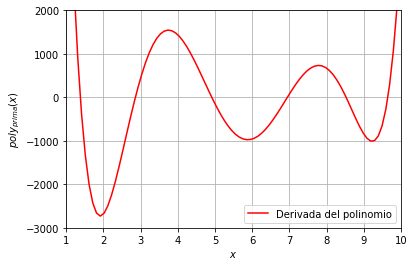

In [5]:
#Hallando raices de la derivada del polinomio

#primero graficare para saber donde buscar las raices
x_axis = np.linspace(0,10,100)
plt.plot(x_axis, dp(x_axis), 'r-', label = 'Derivada del polinomio')
plt.xlim(1,10)
plt.ylim(-3000,2000)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$poly_{prima}(x)$')
plt.grid()
plt.show()


In [6]:
#Para hallar los puntos criticos usare metodo de biseccion

r0 = optimize.bisect(dp,1,2)
r1 = optimize.bisect(dp,2,3)
r2 = optimize.bisect(dp,4,5)
r3 = optimize.bisect(dp,6.5,7.2)
r4 = optimize.bisect(dp,8,9)
r5 = optimize.bisect(dp,9,10)

puntos_crit = np.array([r0,r1,r2,r3,r4,r5]) #Arreglo de numpy con los puntos criticos hallados
puntos_crit

array([1.38228371, 2.86280956, 4.91669337, 6.94750388, 8.52781656,
       9.6486072 ])

_punto 2c) y 2d)_

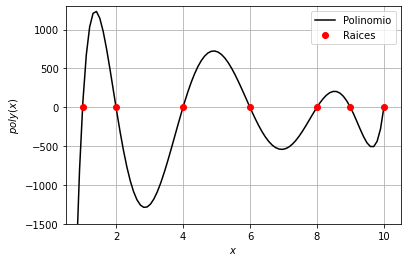

In [7]:
#Graficando polinomio para comparar los minimos y maximos dados por fmi_powell y por el polinomio evaluado en los puntos criticos
plt.plot(x_axis,poly(x_axis),'k-', label = 'Polinomio')
plt.plot(roots_,poly(roots_),'ro', label = 'Raices')
plt.grid()
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$poly(x)$')
plt.xlim(0.5,10.5)
plt.ylim(-1500,1300)
plt.show()

In [8]:
#Para el intervalo [0,10] el polinomio aparenta tener un maximo global alrededor de 1.5 y un minimo global alrededor de 2.9

#MAXIMO

max_w_fmin = optimize.fmin_powell(-1*poly, 1.5, full_output=True) #Maximo hallado con scipy
max_w_crit_point = poly(puntos_crit[0]) #Maximo hallado con punto critico

#================================

#MINIMO

min_w_fmin = optimize.fmin_powell(poly, 3, full_output=True) #Minimo hallado con scipy
min_w_crit_point = poly(puntos_crit[1]) #Minimo hallado con punto critico

#=========================
print('\n')

print('Punto maximo hallado evaluando la funcion en el punto critico es y = {}'.format(max_w_crit_point))
print('Punto maximo hallado con scipy es y = {}'.format(-1*max_w_fmin[1]))

print('\n')

print('Punto minimo hallado evaluando la funcion en el punto critico es y = {}'.format(min_w_crit_point))
print('Punto minimo hallado con scipy es y = {}'.format(min_w_fmin[1]))

print('\n')

print('Efectivamente, el valor con los dos metodos es el mismo, obviando una pequeñisima diferencia del valor')

Optimization terminated successfully.
         Current function value: -1240.080275
         Iterations: 2
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: -1290.268338
         Iterations: 2
         Function evaluations: 25


Punto maximo hallado evaluando la funcion en el punto critico es y = 1240.0802746727422
Punto maximo hallado con scipy es y = 1240.080274672735


Punto minimo hallado evaluando la funcion en el punto critico es y = -1290.2683378348083
Punto minimo hallado con scipy es y = -1290.268337834801


Efectivamente, el valor con los dos metodos es el mismo, obviando una pequeñisima diferencia del valor
